#  Corona vaccine progress 

version 1.0 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out
* discussion about 

## Why is Sweden underperforming regarding reporting?
* Swedish FHM try to explain why they underperform see [discussion in Swedish](https://community.dataportal.se/topic/77/tillg%C3%A4nglighetsdirektivet-och-publicerade-%C3%B6ppna-data/3?_=1617769671095) 
  * email sent to ask FHM Sweden deliver data as data see [blogpost](https://minancestry.blogspot.com/2021/04/exempel-kommunikation-med-fhm-for-att.html)
* Sweden is nearly never presenting updated numbers and its not machinereadable see [list](https://github.com/salgo60/CoronaVaccinationCheck/blob/main/What%20is%20reported.ipynb)

### To do
* [Issue 11](https://github.com/salgo60/CoronaVaccinationCheck/issues/11)  redo and split number vaccinations / number people vaccinated.

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-04-15 15:52:16.494563


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Afghanistan,AFG,Oxford/AstraZeneca,2021-04-07,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Albania,ALB,"Pfizer/BioNTech, Sinovac",2021-04-13,Ministry of Health,https://twitter.com/gmanastirliu/status/138204...
2,Algeria,DZA,Sputnik V,2021-02-19,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
3,Andorra,AND,"Oxford/AstraZeneca, Pfizer/BioNTech",2021-04-12,Government of Andorra,https://www.govern.ad/comunicats/item/12642-me...
4,Angola,AGO,Oxford/AstraZeneca,2021-04-11,Ministry of Health,https://www.verangola.net/va/en/042021/Health/...
...,...,...,...,...,...,...
172,Uzbekistan,UZB,Oxford/AstraZeneca,2021-04-11,Government of Uzbekistan,https://www.uzdaily.uz/en/post/64774
173,Venezuela,VEN,Sputnik V,2021-04-12,Government of Venezuela,https://www.swissinfo.ch/spa/coronavirus-venez...
174,Vietnam,VNM,Oxford/AstraZeneca,2021-04-09,Government of Vietnam,https://nhandan.com.vn/tin-tuc-y-te/sang-ngay-...
175,Wales,OWID_WLS,"Oxford/AstraZeneca, Pfizer/BioNTech",2021-04-13,Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [5]:
#order by last updated ascending
countries_csv = countries_csv.sort_values(by=['last_observation_date'],ascending=False)
#countries_csv.reindex(["location"])
countries_csv.reset_index(drop=True, inplace=True)
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Iceland,ISL,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2021-04-14,Directorate of Health,https://www.covid.is/tolulegar-upplysingar-bol...
1,Lebanon,LBN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",2021-04-14,Government of Lebanon,https://impact.cib.gov.lb/home/dashboard/vaccine
2,Kosovo,OWID_KOS,Oxford/AstraZeneca,2021-04-14,Ministry of Health,https://www.facebook.com/Ministria.Shendetesis...
3,Japan,JPN,Pfizer/BioNTech,2021-04-14,Prime Minister's Office,https://www.kantei.go.jp/jp/headline/kansensho...
4,Italy,ITA,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2021-04-14,Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...
...,...,...,...,...,...,...
172,Turks and Caicos Islands,TCA,Pfizer/BioNTech,2021-03-21,Ministry of Health,https://www.facebook.com/tcihealthpromotions/p...
173,Nepal,NPL,Oxford/AstraZeneca,2021-03-19,Government of Nepal,https://reliefweb.int/report/nepal/first-asia-...
174,Laos,LAO,"Sinopharm/Beijing, Sputnik V",2021-03-17,Government of Laos,http://www.xinhuanet.com/english/asiapacific/2...
175,Algeria,DZA,Sputnik V,2021-02-19,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...


## Latest reported

In [6]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:20]

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
2527,Greenland,2021-04-14,Pfizer/BioNTech,https://corona.nun.gl/emner/statistik/antal_va...,10142.0,5845.0,4297.0,GRL,Pfizer/BioNTech,2021-04-14,Government of Greenland,https://corona.nun.gl/emner/statistik/antal_va...,both
4167,Mexico,2021-04-14,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",https://www.gob.mx/salud/prensa/154-se-preve-i...,12407625.0,NaN,NaN,MEX,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",2021-04-14,Secretary of Health,https://www.gob.mx/salud/prensa/154-se-preve-i...,both
6794,United States,2021-04-14,"Johnson&Johnson, Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,194791836.0,123917385.0,76681252.0,USA,"Johnson&Johnson, Moderna, Pfizer/BioNTech",2021-04-14,Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,both
367,Azerbaijan,2021-04-14,Sinovac,https://koronavirusinfo.az,1243191.0,813413.0,429778.0,AZE,Sinovac,2021-04-14,Government of Azerbaijan,https://koronavirusinfo.az,both
4270,Montenegro,2021-04-14,"Sinopharm/Beijing, Sputnik V",https://www.covidodgovor.me/,46917.0,36690.0,10227.0,MNE,"Sinopharm/Beijing, Sputnik V",2021-04-14,Government of Montenegro,https://www.covidodgovor.me/,both
6180,Sweden,2021-04-14,"Oxford/AstraZeneca, Pfizer/BioNTech",https://www.folkhalsomyndigheten.se/smittskydd...,2175221.0,1543414.0,631807.0,SWE,"Oxford/AstraZeneca, Pfizer/BioNTech",2021-04-14,Public Health Agency of Sweden,https://www.folkhalsomyndigheten.se/smittskydd...,both
5326,Saint Lucia,2021-04-14,Oxford/AstraZeneca,https://www.covid19response.lc/,23345.0,NaN,NaN,LCA,Oxford/AstraZeneca,2021-04-14,Ministry of Health,https://www.covid19response.lc/,both
1606,Czechia,2021-04-14,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",https://onemocneni-aktualne.mzcr.cz/covid-19,2278965.0,1482502.0,796468.0,CZE,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",2021-04-14,Ministry of Health,https://onemocneni-aktualne.mzcr.cz/covid-19,both
2653,Hong Kong,2021-04-14,"Pfizer/BioNTech, Sinovac",https://www.covidvaccine.gov.hk/en/dashboard,950996.0,632291.0,318705.0,HKG,"Pfizer/BioNTech, Sinovac",2021-04-14,Government of Hong Kong,https://www.covidvaccine.gov.hk/en/dashboard,both
6077,Spain,2021-04-14,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",https://www.mscbs.gob.es/profesionales/saludPu...,11436073.0,8250887.0,3185186.0,ESP,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2021-04-14,Ministry of Health,https://www.mscbs.gob.es/profesionales/saludPu...,both


In [7]:
#Countries in list
allCountries["location"].value_counts()

Canada        122
Israel        117
Chile         111
Portugal      109
Slovenia      109
             ... 
Mali            2
Eswatini        2
Cape Verde      2
Laos            1
Armenia         1
Name: location, Length: 178, dtype: int64

In [8]:
allCountries.groupby(["location", "vaccine"]).size()

location     vaccine                            
Afghanistan  Oxford/AstraZeneca                      4
Albania      Pfizer/BioNTech                        29
             Pfizer/BioNTech, Sinovac               15
Algeria      Sputnik V                               3
Andorra      Pfizer/BioNTech                         7
                                                    ..
Venezuela    Sputnik V                               6
Vietnam      Oxford/AstraZeneca                     34
Wales        Oxford/AstraZeneca, Pfizer/BioNTech    92
             Pfizer/BioNTech                         1
Zimbabwe     Sinopharm/Beijing                      52
Length: 263, dtype: int64

In [9]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6653 entries, 0 to 7029
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 6653 non-null   object        
 1   date                     6653 non-null   datetime64[ns]
 2   vaccine                  6653 non-null   object        
 3   source_url               6653 non-null   object        
 4   total_vaccinations       6570 non-null   float64       
 5   people_vaccinated        5884 non-null   float64       
 6   people_fully_vaccinated  5005 non-null   float64       
 7   iso_code                 6651 non-null   object        
 8   vaccines                 6651 non-null   object        
 9   last_observation_date    6651 non-null   object        
 10  source_name              6651 non-null   object        
 11  source_website           6651 non-null   object        
 12  _merge                   6653 non-

In [10]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','people_vaccinated','people_fully_vaccinated','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
worldfully_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["people_fully_vaccinated"]).replace(',', ' ')
titlestring = "Total Vaccination: " + worldtotal_vaccinations_str + " fully: " + worldfully_vaccinations_str + " "
print(titlestring, plotLatestCountries.shape)


Total Vaccination: 839 916 888.0 fully: 179 846 616.0  (174, 5)


## Charts

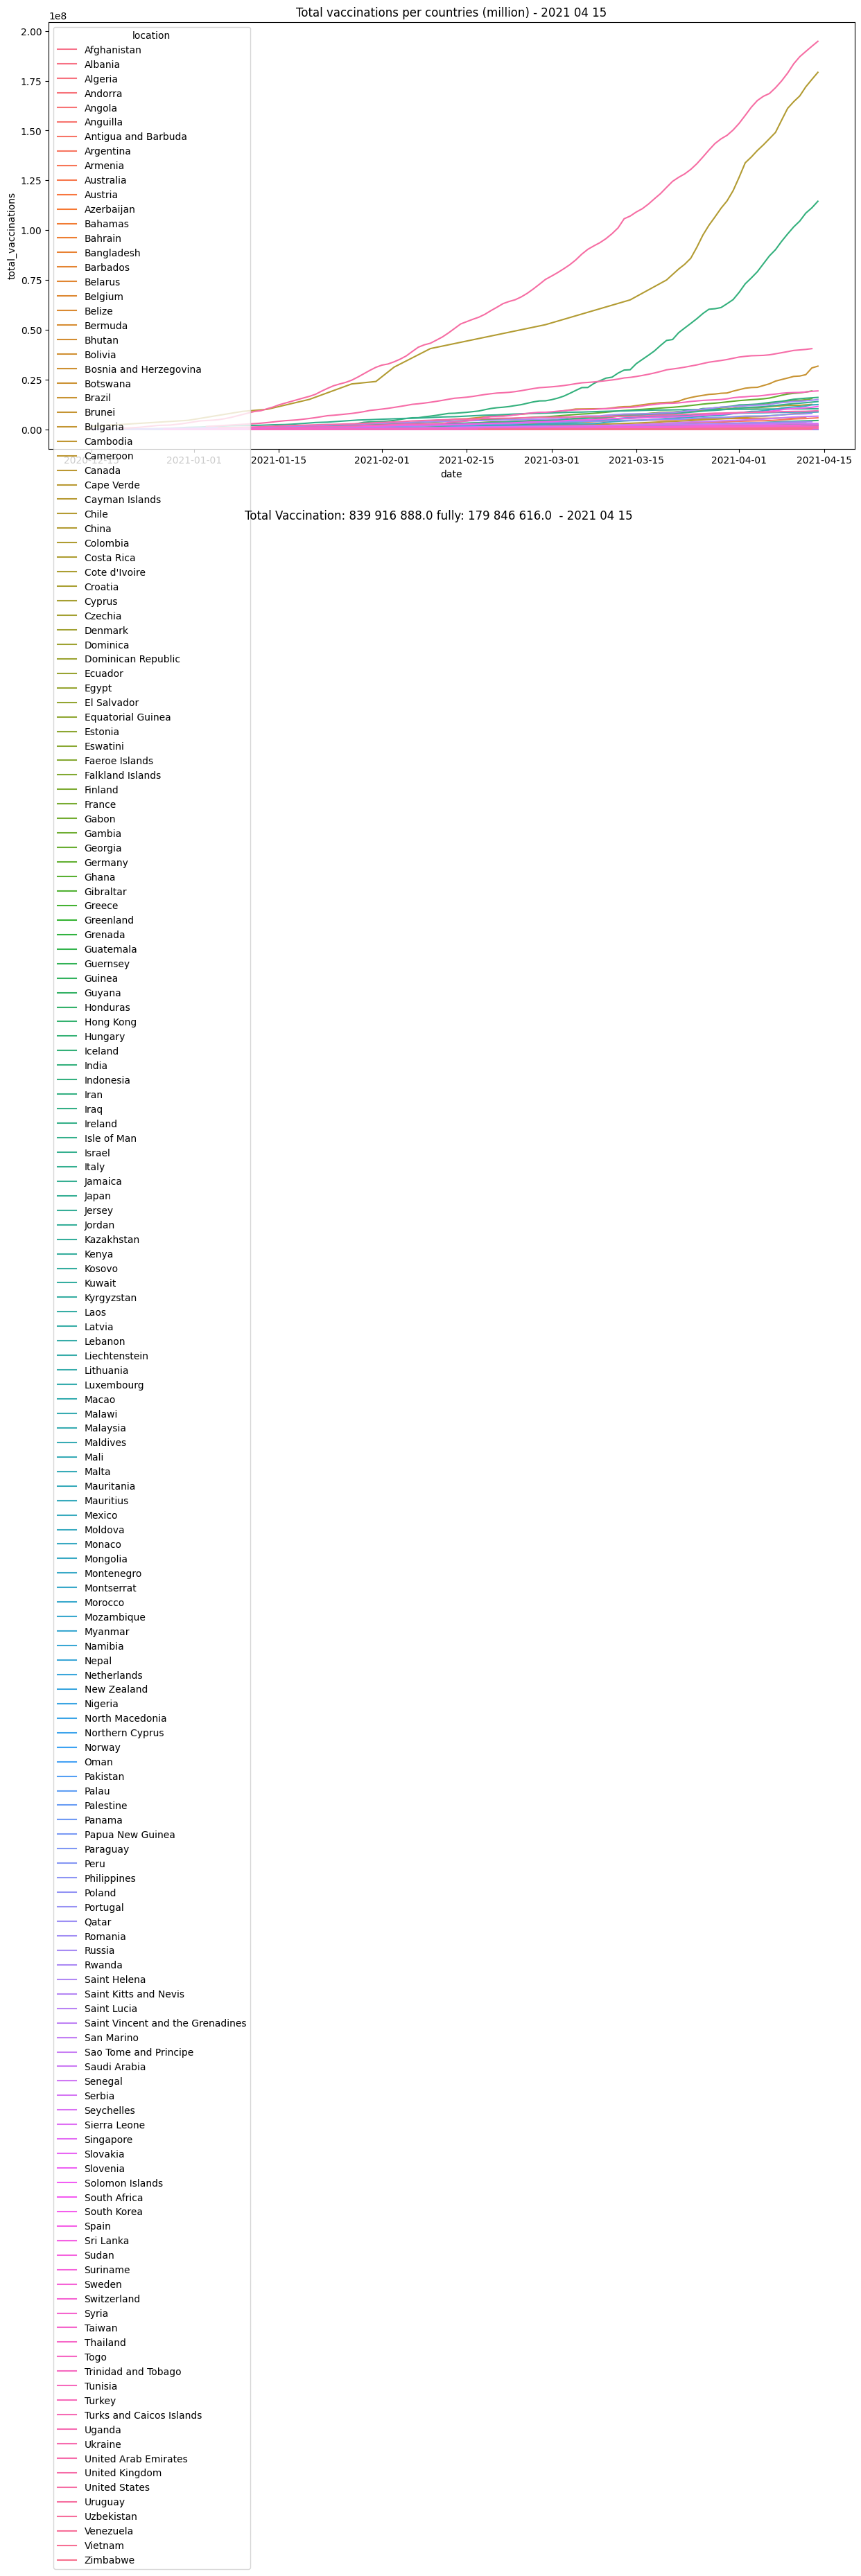

In [11]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Total vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle(titlestring + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


In [12]:
#plotLatestFullyCountries = plotLatestCountries[plotLatestCountries[people_fully_vaccinated] > 0]

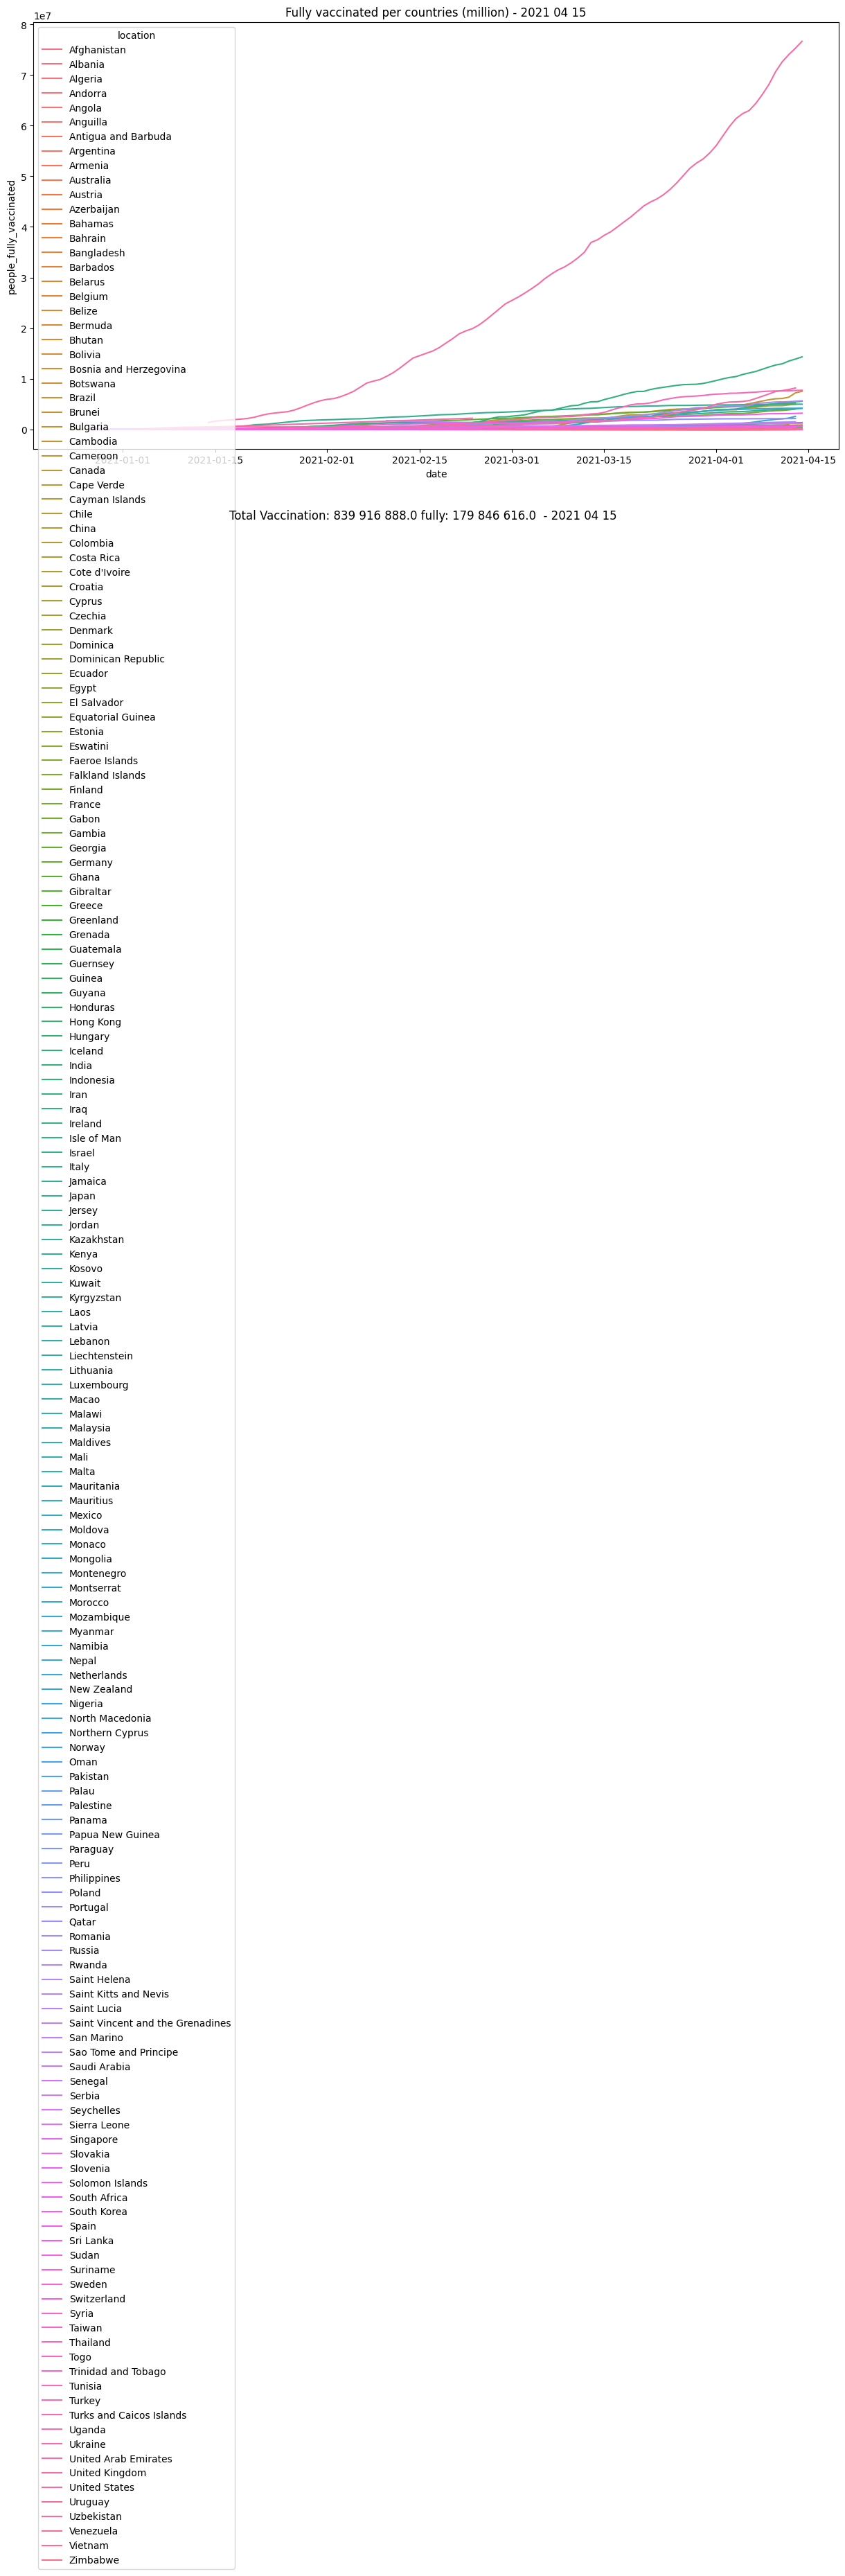

In [13]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="people_fully_vaccinated", hue="location" )
plt.title("Fully vaccinated per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle(titlestring + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/CoronaFully_Line.png',bbox_inches='tight')  
plt.show() 


In [14]:
allCountriesFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6653 entries, 0 to 7029
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 6653 non-null   object        
 1   date                     6653 non-null   datetime64[ns]
 2   vaccine                  6653 non-null   object        
 3   source_url               6653 non-null   object        
 4   total_vaccinations       6570 non-null   float64       
 5   people_vaccinated        5884 non-null   float64       
 6   people_fully_vaccinated  5005 non-null   float64       
 7   iso_code                 6651 non-null   object        
 8   vaccines                 6651 non-null   object        
 9   last_observation_date    6651 non-null   object        
 10  source_name              6651 non-null   object        
 11  source_website           6651 non-null   object        
 12  _merge                   6653 non-

In [15]:
allCountriesFiltered

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
0,Afghanistan,2021-02-22,Oxford/AstraZeneca,https://tolonews.com/index.php/health-170225,0.0,0.0,NaN,AFG,Oxford/AstraZeneca,2021-04-07,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,both
1,Afghanistan,2021-02-28,Oxford/AstraZeneca,https://tolonews.com/index.php/health-170355,8200.0,8200.0,NaN,AFG,Oxford/AstraZeneca,2021-04-07,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,both
2,Afghanistan,2021-03-16,Oxford/AstraZeneca,http://www.xinhuanet.com/english/asiapacific/2...,54000.0,54000.0,NaN,AFG,Oxford/AstraZeneca,2021-04-07,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,both
3,Afghanistan,2021-04-07,Oxford/AstraZeneca,http://www.xinhuanet.com/english/asiapacific/2...,120000.0,120000.0,NaN,AFG,Oxford/AstraZeneca,2021-04-07,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,both
4,Albania,2021-01-10,Pfizer/BioNTech,https://www.france24.com/en/live-news/20210111...,0.0,0.0,NaN,ALB,"Pfizer/BioNTech, Sinovac",2021-04-13,Ministry of Health,https://twitter.com/gmanastirliu/status/138204...,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,Zimbabwe,2021-04-09,Sinopharm/Beijing,https://twitter.com/MoHCCZim/status/1380627315...,206205.0,178237.0,27968.0,ZWE,Sinopharm/Beijing,2021-04-13,Ministry of Health,https://twitter.com/MoHCCZim/status/1382069276...,both
7026,Zimbabwe,2021-04-10,Sinopharm/Beijing,https://twitter.com/MoHCCZim/status/1380976710...,222733.0,193936.0,28797.0,ZWE,Sinopharm/Beijing,2021-04-13,Ministry of Health,https://twitter.com/MoHCCZim/status/1382069276...,both
7027,Zimbabwe,2021-04-11,Sinopharm/Beijing,https://twitter.com/MoHCCZim/status/1381379556...,223492.0,194594.0,28898.0,ZWE,Sinopharm/Beijing,2021-04-13,Ministry of Health,https://twitter.com/MoHCCZim/status/1382069276...,both
7028,Zimbabwe,2021-04-12,Sinopharm/Beijing,https://twitter.com/MoHCCZim/status/1381698492...,234579.0,205275.0,29304.0,ZWE,Sinopharm/Beijing,2021-04-13,Ministry of Health,https://twitter.com/MoHCCZim/status/1382069276...,both


In [16]:
# Resample dates Forward filling and sum

#allCountriesFiltered
#grouper = allCountriesFiltered.groupby([pd.Grouper(key="date",freq='1D'), 'location']).mean() 


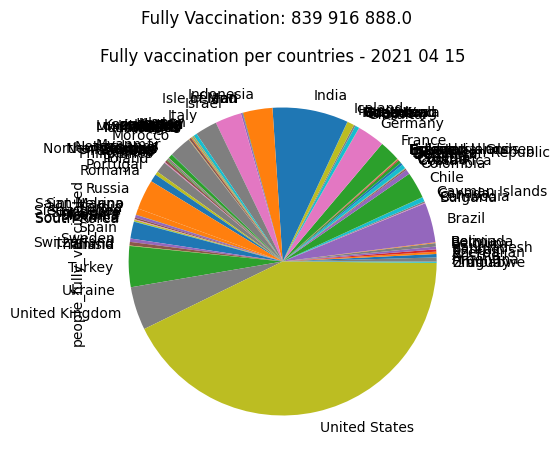

In [17]:
#people_fully_vaccinated
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["people_fully_vaccinated"].plot( y='location',kind = 'pie') 
plt.title("Fully vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Fully Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_FuVaccinationperCountry.png')  
plt.show() 


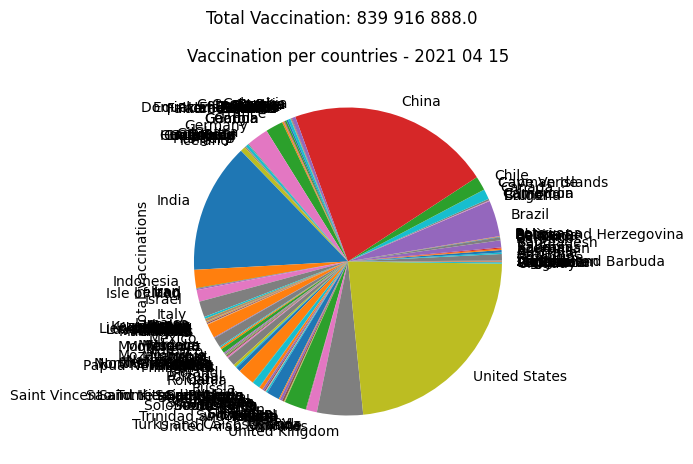

In [18]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [19]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccine,iso_code
location,,,,,
United States,194791836.0,123917385.0,76681252.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",USA
China,179216000.0,NaN,NaN,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",CHN
India,114493238.0,100179199.0,14314039.0,"Covaxin, Oxford/AstraZeneca",IND
United Kingdom,40496685.0,32326604.0,8170081.0,"Oxford/AstraZeneca, Pfizer/BioNTech",GBR
Brazil,31703967.0,24197321.0,7506646.0,"Oxford/AstraZeneca, Sinovac",BRA
...,...,...,...,...,...
Cameroon,400.0,400.0,0.0,Sinopharm/Beijing,CMR
Papua New Guinea,250.0,250.0,0.0,Oxford/AstraZeneca,PNG
Belarus,NaN,92000.0,NaN,Sputnik V,BLR


In [20]:
plotLatestCountries.shape

(174, 5)

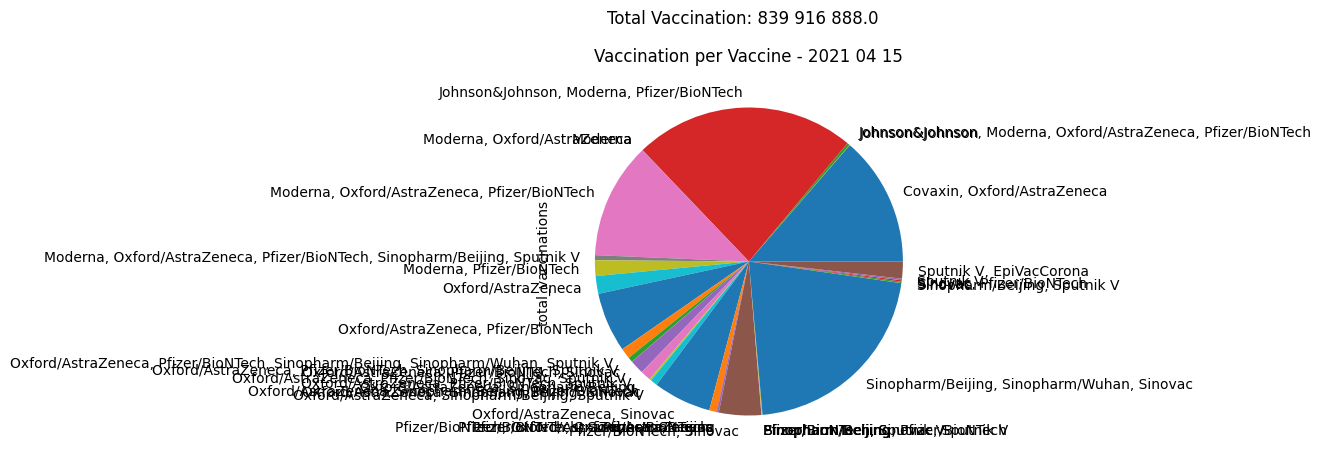

In [21]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [22]:
plotVaccine.sort_values(ascending=True)

vaccine
Moderna                                                                                    3109.0
Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V                                            15000.0
Pfizer/BioNTech, Sputnik V                                                                18835.0
Pfizer/BioNTech, Oxford/AstraZeneca                                                       19064.0
Sinopharm/Beijing, Pfizer/BioNTech                                                        71196.0
Sinopharm/Beijing, Sputnik V                                                              87649.0
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                             104978.0
Pfizer/BioNTech, Sinovac, Sputnik V                                                      175439.0
Moderna, Oxford/AstraZeneca                                                              205253.0
Johnson&Johnson                                                                          292623.0
Oxford/Astra

In [23]:
# Sweden have 10 000 doses....
#allCountries

In [24]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-04-15 15:53:22.549321
Time elapsed (hh:mm:ss.ms) 0:01:06.054890


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [25]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  195 non-null    object
 1   continent            195 non-null    object
 2   memberEU             195 non-null    object
 3   country              195 non-null    object
 4   qid                  195 non-null    object
 5   population           195 non-null    object
 6   ISO3166_1            195 non-null    object
 7   nominalGDPperCapita  0 non-null      object
 8   G20                  195 non-null    object
 9   IMF                  195 non-null    object
 10  genderH              195 non-null    object
dtypes: object(11)
memory usage: 16.9+ KB


In [26]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
1,http://www.wikidata.org/entity/Q37,Europe,true,Lithuania,Q37,2790842,LTU,None,false,false,female
193,http://www.wikidata.org/entity/Q695,Oceania,false,Palau,Q695,21729,PLW,None,false,false,male
96,http://www.wikidata.org/entity/Q1030,Africa,false,Namibia,Q1030,2533794,NAM,None,false,false,female
112,http://www.wikidata.org/entity/Q1011,Africa,false,Cape Verde,Q1011,546388,CPV,None,false,true,male
97,http://www.wikidata.org/entity/Q77,South America,false,Uruguay,Q77,3456750,URY,None,false,false,male


In [27]:
plotLatestCountries

,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccine,iso_code
location,,,,,
Afghanistan,120000.0,120000.0,NaN,Oxford/AstraZeneca,AFG
Albania,281216.0,NaN,NaN,"Pfizer/BioNTech, Sinovac",ALB
Algeria,75000.0,NaN,NaN,Sputnik V,DZA
Andorra,19064.0,NaN,NaN,"Pfizer/BioNTech, Oxford/AstraZeneca",AND
Angola,245442.0,245442.0,NaN,Oxford/AstraZeneca,AGO
...,...,...,...,...,...
Uruguay,1188238.0,966016.0,222222.0,"Sinovac, Pfizer/BioNTech",URY
Uzbekistan,148642.0,148642.0,0.0,Oxford/AstraZeneca,UZB
Venezuela,250000.0,250000.0,NaN,Sputnik V,VEN


In [28]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,120000.0,120000.0,NaN,Oxford/AstraZeneca,AFG,http://www.wikidata.org/entity/Q889,Asia,false,Afghanistan,Q889,36643815,AFG,None,false,false,male,both
1,281216.0,NaN,NaN,"Pfizer/BioNTech, Sinovac",ALB,http://www.wikidata.org/entity/Q222,Europe,false,Albania,Q222,3020209,ALB,None,false,false,male,both
2,75000.0,NaN,NaN,Sputnik V,DZA,http://www.wikidata.org/entity/Q262,Africa,false,Algeria,Q262,41318142,DZA,None,false,false,male,both
3,19064.0,NaN,NaN,"Pfizer/BioNTech, Oxford/AstraZeneca",AND,http://www.wikidata.org/entity/Q228,Europe,false,Andorra,Q228,76177,AND,None,false,false,male,both
4,245442.0,245442.0,NaN,Oxford/AstraZeneca,AGO,http://www.wikidata.org/entity/Q916,Africa,false,Angola,Q916,29784193,AGO,None,false,false,male,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1188238.0,966016.0,222222.0,"Sinovac, Pfizer/BioNTech",URY,http://www.wikidata.org/entity/Q77,South America,false,Uruguay,Q77,3456750,URY,None,false,false,male,both
151,148642.0,148642.0,0.0,Oxford/AstraZeneca,UZB,http://www.wikidata.org/entity/Q265,Asia,false,Uzbekistan,Q265,33570609,UZB,None,false,false,male,both
152,250000.0,250000.0,NaN,Sputnik V,VEN,http://www.wikidata.org/entity/Q717,South America,false,Venezuela,Q717,28515829,VEN,None,false,false,male,both
153,58037.0,58037.0,0.0,Oxford/AstraZeneca,VNM,http://www.wikidata.org/entity/Q881,Asia,false,Vietnam,Q881,94660000,VNM,None,false,false,male,both


In [29]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   total_vaccinations       152 non-null    float64 
 1   people_vaccinated        137 non-null    float64 
 2   people_fully_vaccinated  118 non-null    float64 
 3   vaccine                  155 non-null    object  
 4   iso_code                 155 non-null    object  
 5   cid                      155 non-null    object  
 6   continent                155 non-null    object  
 7   memberEU                 155 non-null    int64   
 8   country                  155 non-null    object  
 9   qid                      155 non-null    object  
 10  population               155 non-null    int64   
 11  ISO3166_1                155 non-null    object  
 12  nominalGDPperCapita      0 non-null      float64 
 13  G20                      155 non-null    int64   
 14  IMF       

In [30]:
#CountriesData

In [31]:
CountriesData['Country'] = CountriesData.index

In [32]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
people_vaccinated                  0.988767
people_fully_vaccinated            0.937666
memberEU                          -0.034031
population                         0.802450
nominalGDPperCapita                     NaN
G20                                0.501988
IMF                                0.021574
genderFlag                         0.048726
Country                            0.032494
vaccinations_population_percent    0.171657
Name: total_vaccinations, dtype: float64

In [33]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.171657
people_vaccinated                  0.206829
people_fully_vaccinated            0.249944
memberEU                           0.188857
population                        -0.031048
nominalGDPperCapita                     NaN
G20                                0.056117
IMF                               -0.009677
genderFlag                        -0.066788
Country                            0.059300
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [34]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


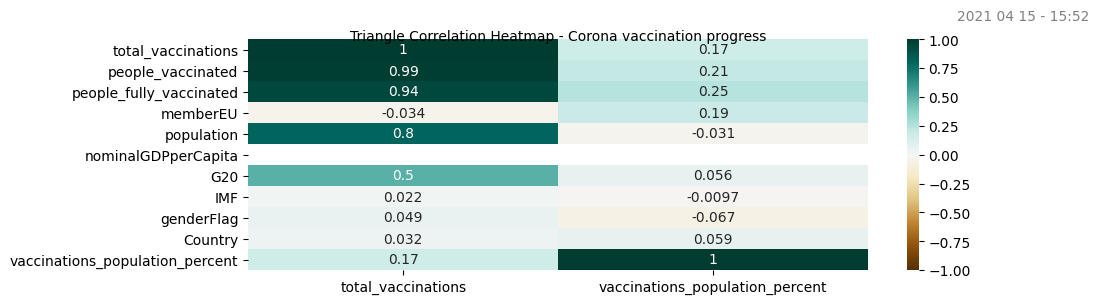

In [35]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [36]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,G20,country,vaccinations_population_percent,total_vaccinations,population,continent,IMF,memberEU
124,0,Seychelles,117.060192,112194.0,95843,Africa,0,0
66,0,Israel,113.258045,10298554.0,9093000,Asia,0,0
147,0,United Arab Emirates,98.886368,9295462.0,9400145,Asia,0,0
29,0,Chile,69.217295,12496993.0,18054726,South America,0,0
83,0,Maldives,68.532762,299029.0,436330,Asia,0,0
...,...,...,...,...,...,...,...,...
106,0,Papua New Guinea,0.003030,250.0,8251162,North America,0,0
26,0,Cameroon,0.001663,400.0,24053727,Africa,0,0
15,0,Belarus,NaN,NaN,9349645,Europe,0,0
41,0,Egypt,NaN,NaN,94798827,Africa,0,0


## Vaccination numbers % of population

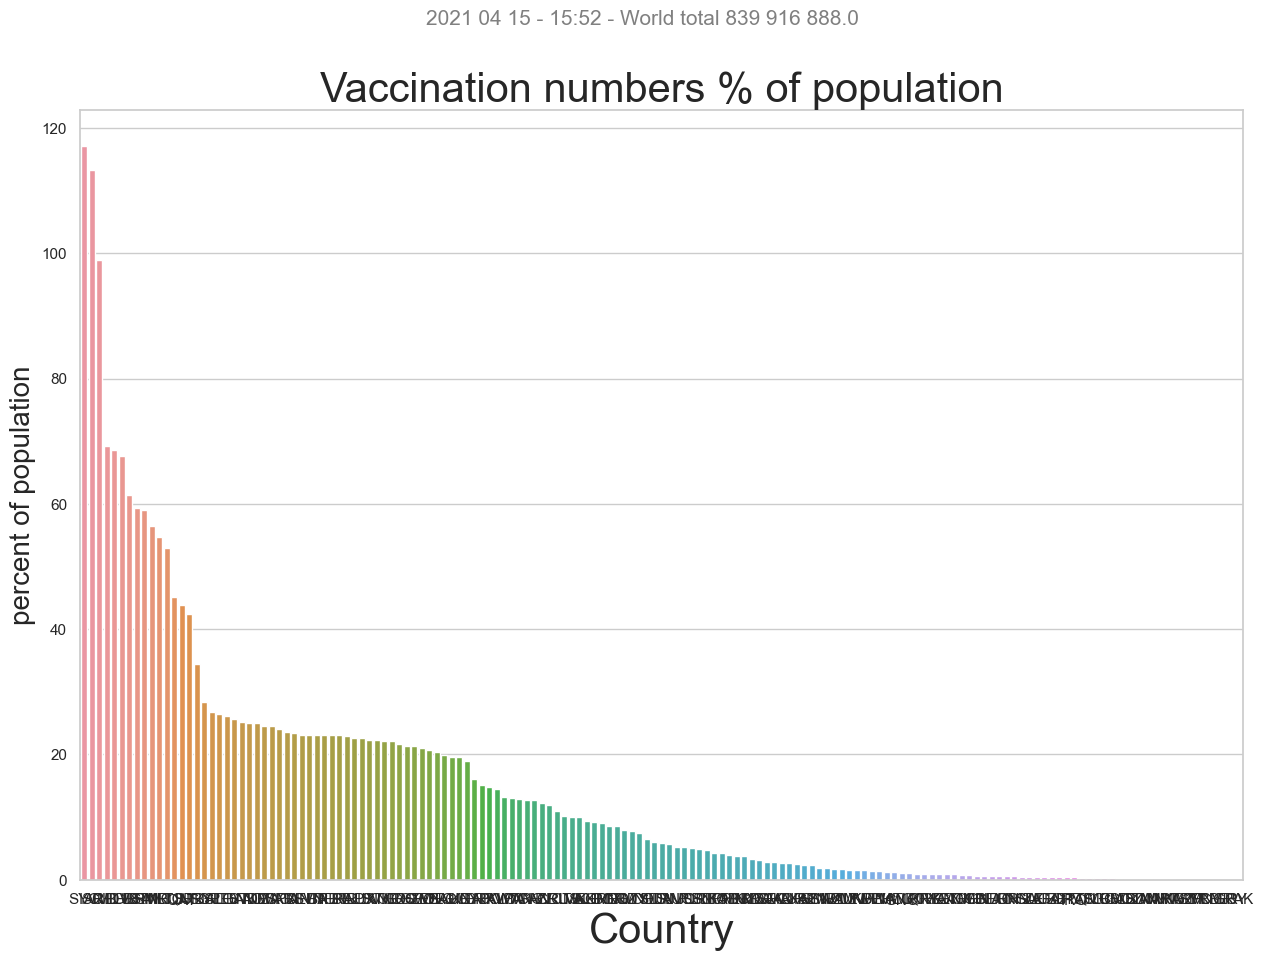

In [37]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

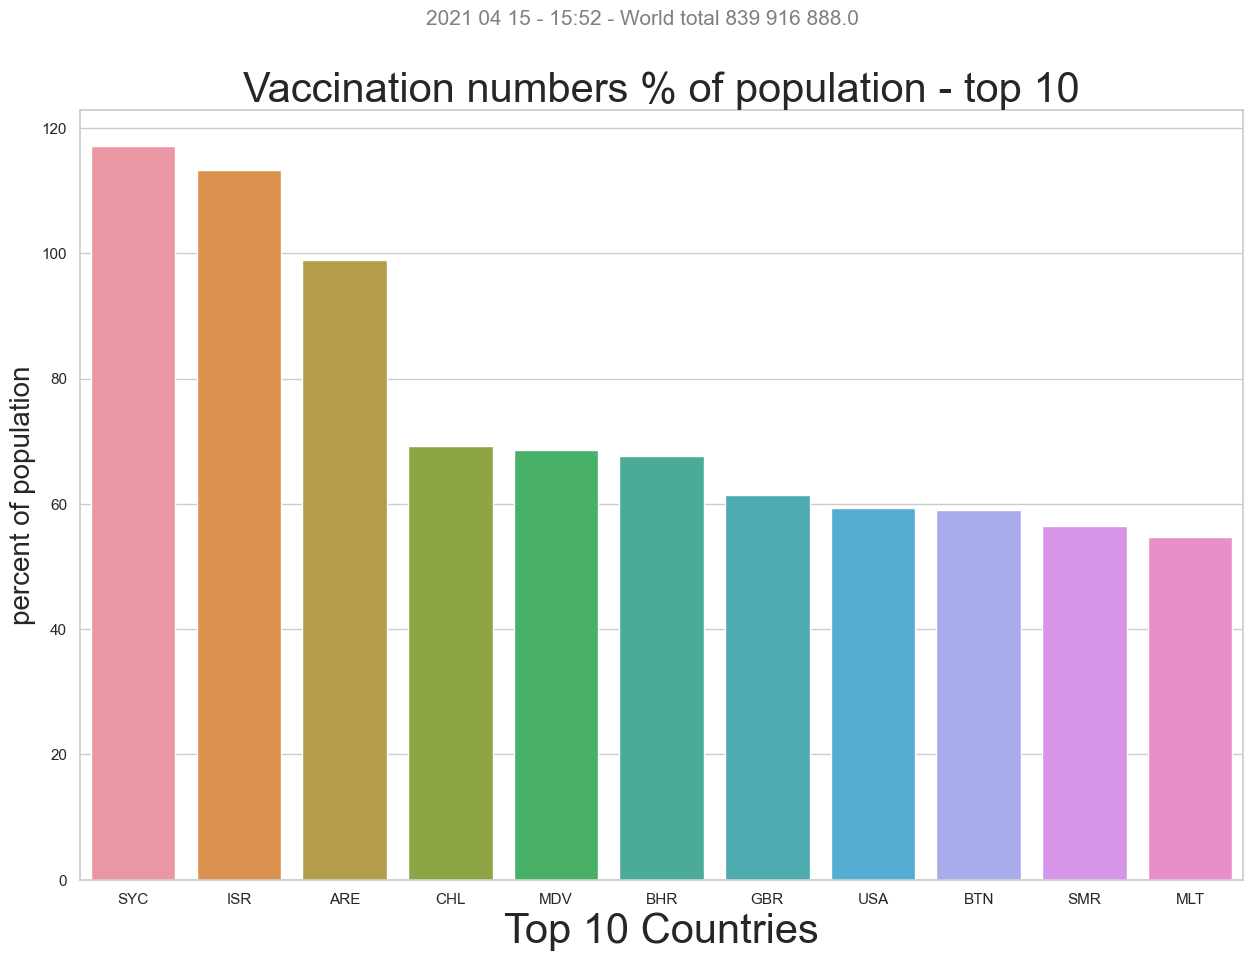

In [38]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

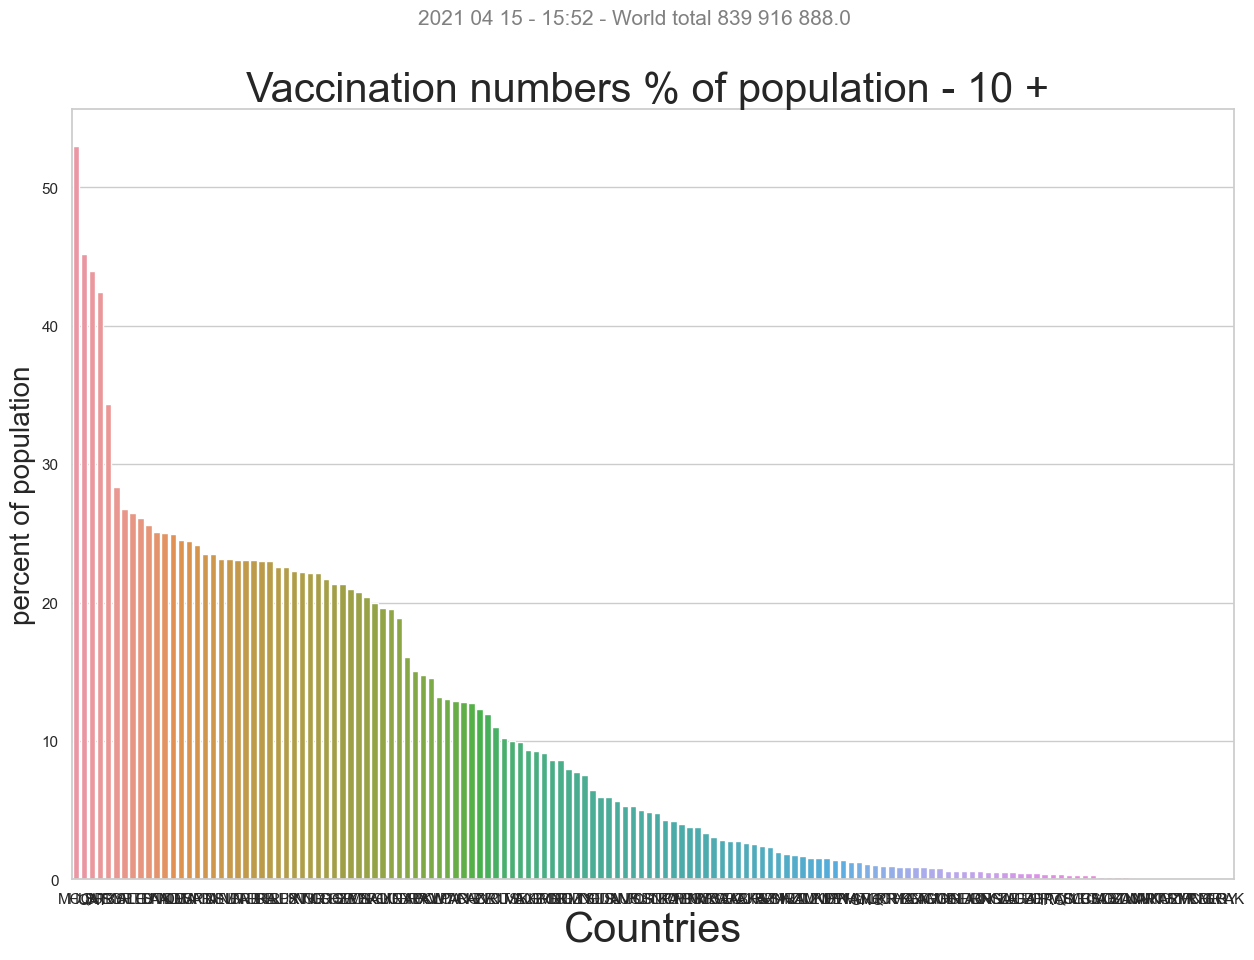

In [39]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

## Scatter plots

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


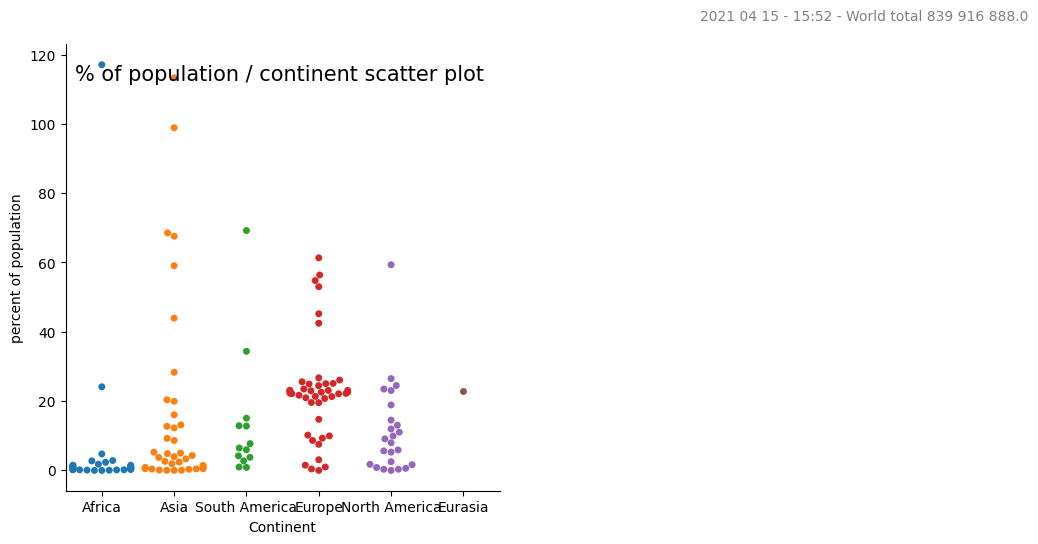

In [40]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 72.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

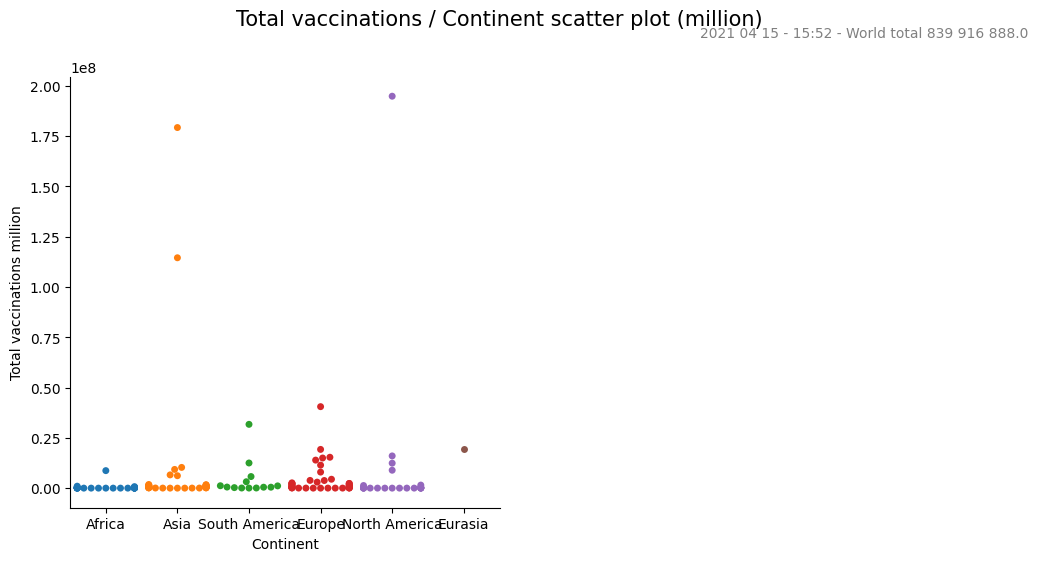

In [41]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [42]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


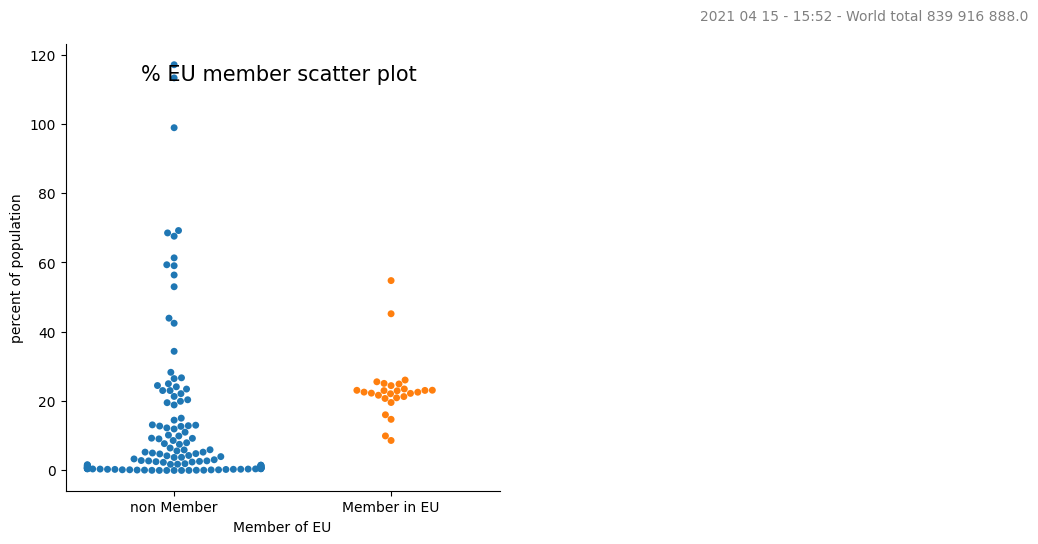

In [43]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


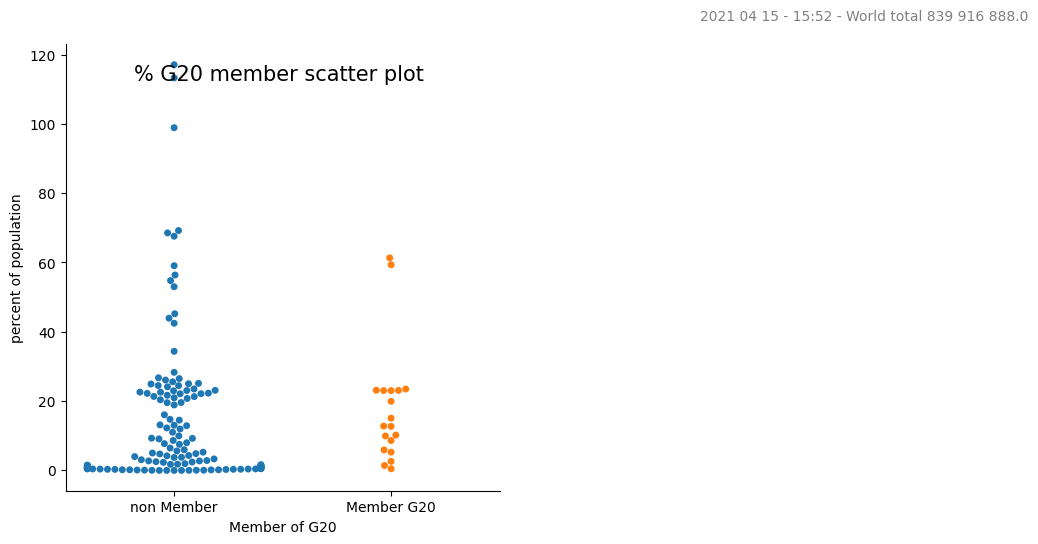

In [44]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


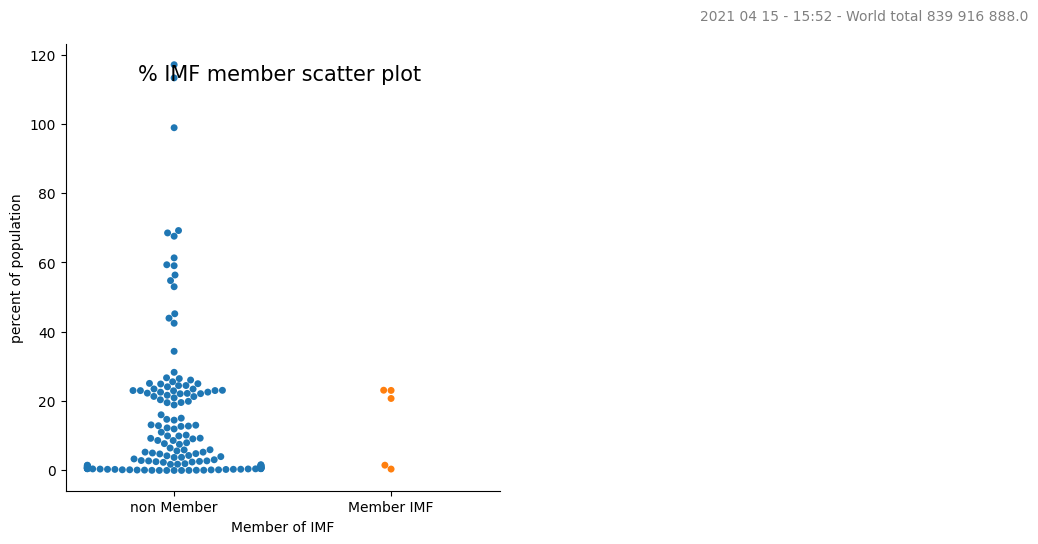

In [45]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [46]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


839 916 888.0 (174, 5) 164 733 752.0


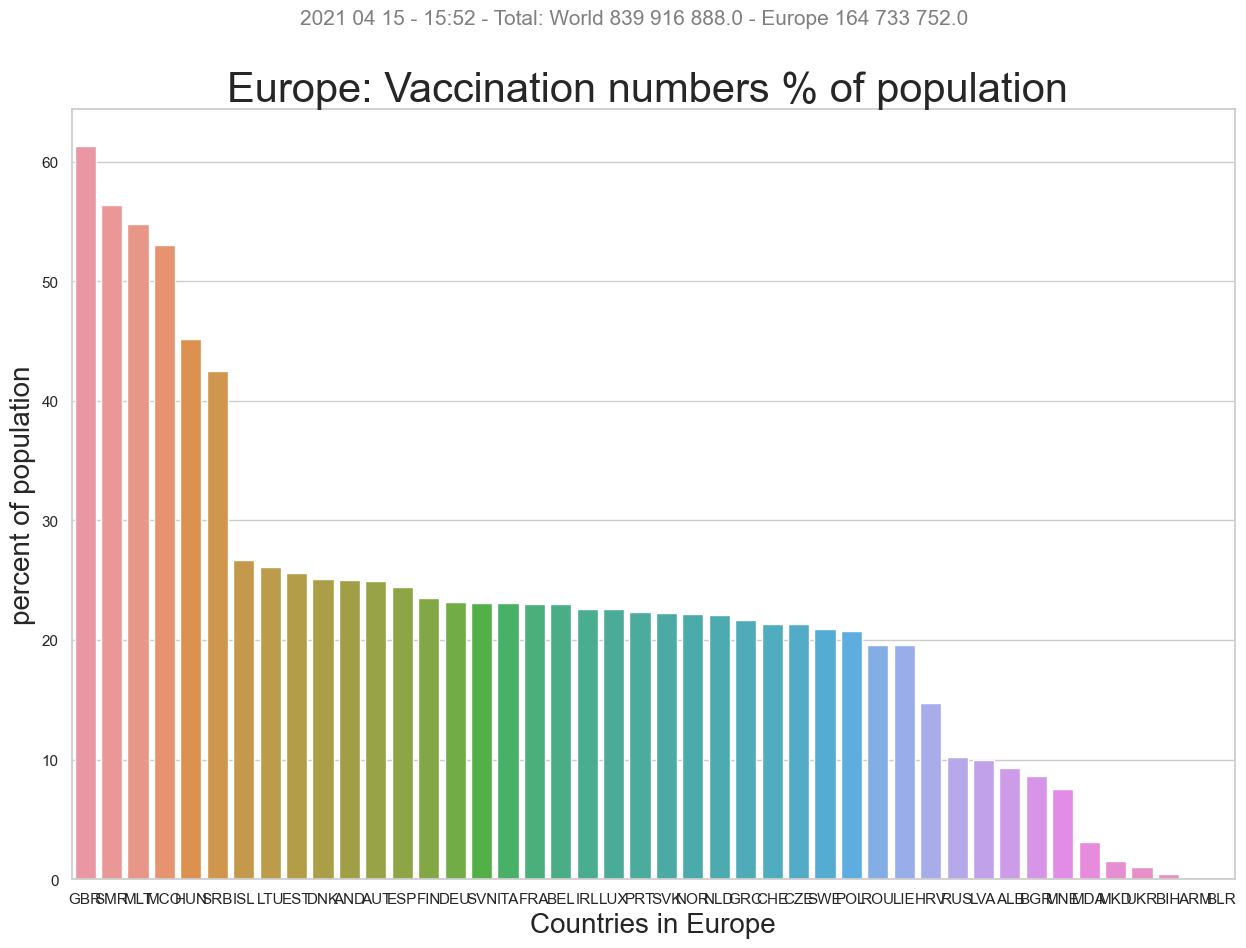

In [47]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [48]:
#CountriesDataEurope

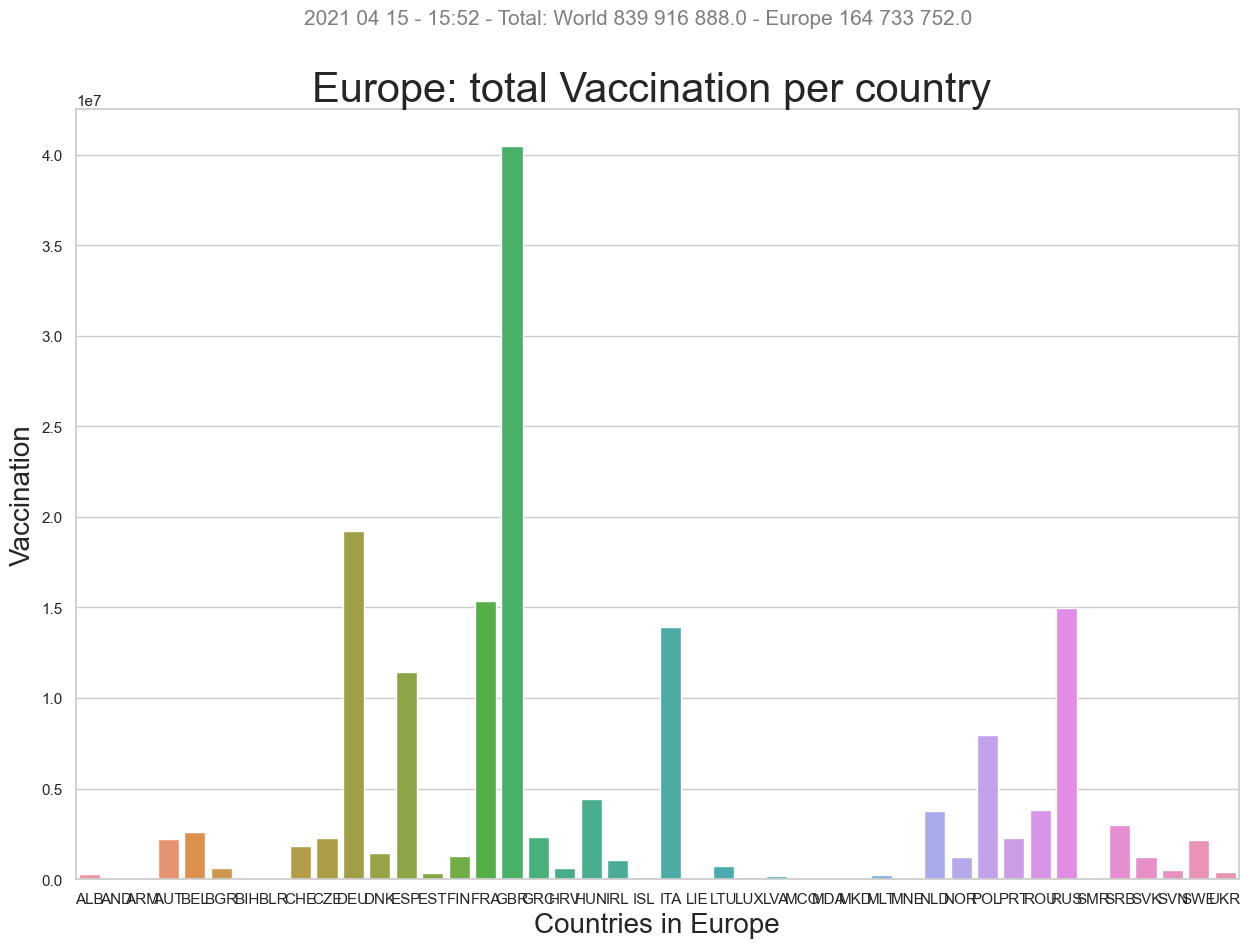

In [49]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [50]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,total_vaccinations,head_gender,ISO3166_1,memberEU,country_x,vaccinations_population_percent
18,281216.0,male,ALB,non Member,Albania,9.311144
41,19064.0,male,AND,non Member,Andorra,25.025926
22,565.0,male,ARM,non Member,Armenia,0.019280
6,2197468.0,male,AUT,Member in EU,Austria,24.945114
16,2626923.0,male,BEL,Member in EU,Belgium,22.979877
5,605377.0,male,BGR,Member in EU,Bulgaria,8.648195
27,15000.0,male,BIH,non Member,Bosnia and Herzegovina,0.427714
21,0.0,male,BLR,non Member,Belarus,0.000000
33,1807703.0,male,CHE,non Member,Switzerland,21.352461
23,2278965.0,male,CZE,Member in EU,Czech Republic,21.310810


## All countries on continent Europe

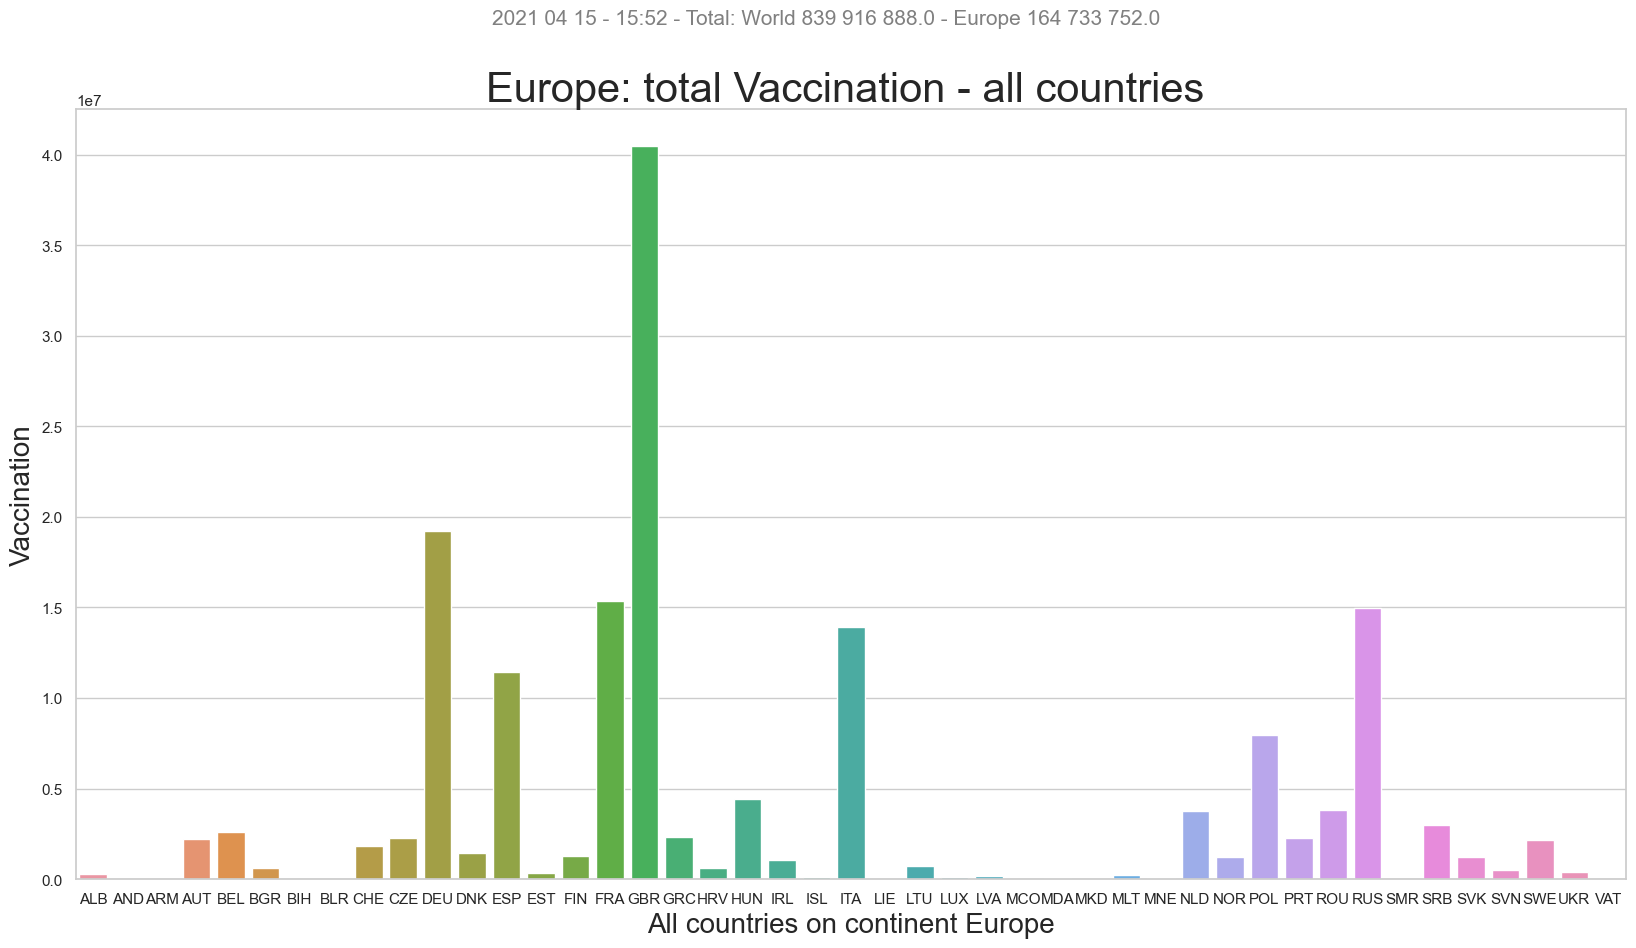

In [51]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [52]:
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 18 to 12
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_vaccinations               45 non-null     float64
 1   head_gender                      45 non-null     object 
 2   ISO3166_1                        45 non-null     object 
 3   memberEU                         45 non-null     object 
 4   country_x                        45 non-null     object 
 5   vaccinations_population_percent  45 non-null     float64
dtypes: float64(2), object(4)
memory usage: 3.5+ KB


In [53]:
CountriesDataEuropeAll


,total_vaccinations,head_gender,ISO3166_1,memberEU,country_x,vaccinations_population_percent
18,281216.0,male,ALB,non Member,Albania,9.311144
41,19064.0,male,AND,non Member,Andorra,25.025926
22,565.0,male,ARM,non Member,Armenia,0.019280
6,2197468.0,male,AUT,Member in EU,Austria,24.945114
16,2626923.0,male,BEL,Member in EU,Belgium,22.979877
5,605377.0,male,BGR,Member in EU,Bulgaria,8.648195
27,15000.0,male,BIH,non Member,Bosnia and Herzegovina,0.427714
21,0.0,male,BLR,non Member,Belarus,0.000000
33,1807703.0,male,CHE,non Member,Switzerland,21.352461
23,2278965.0,male,CZE,Member in EU,Czech Republic,21.310810


### Countries in EU

In [54]:
#CountriesDataEuropeEU[CountriesDataEuropeEU["ISO3166_1"] == "RUS"]
#CountriesDataEuropeEU
CountriesDataEuropeAll.rename(columns = {'country_x': 'country'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'ISO3166_1': 'ISO3166-1'}, inplace = True)

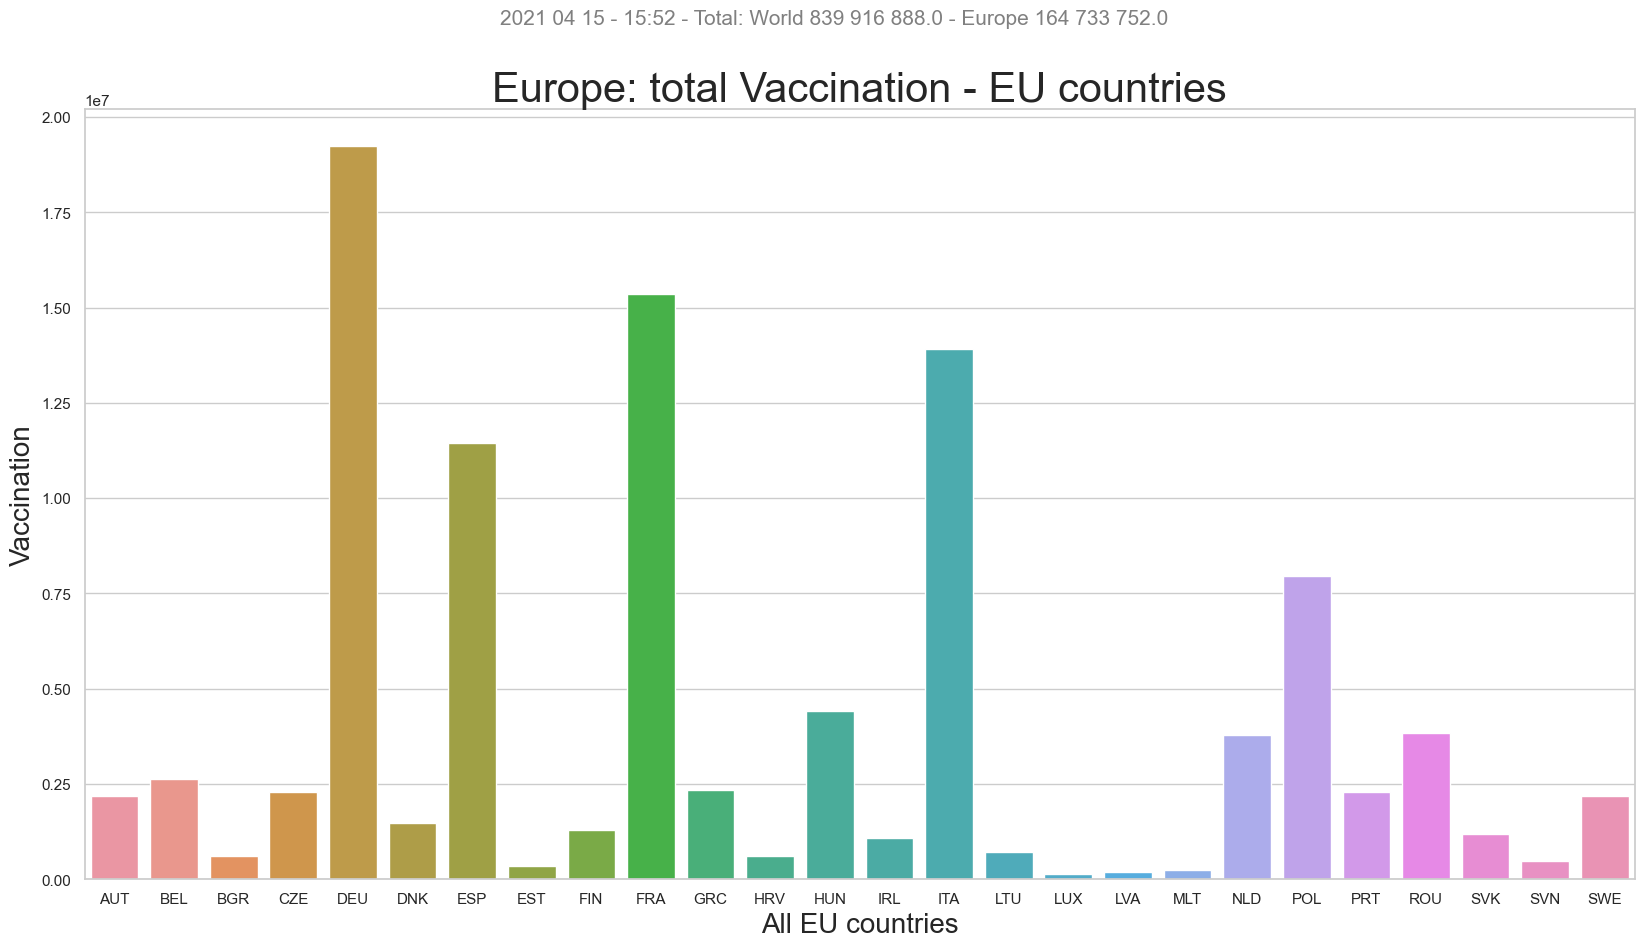

In [55]:
CountriesDataEuropeEU = CountriesDataEuropeAll[CountriesDataEuropeAll["memberEU"] == "Member in EU"]

plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "total_vaccinations", data=CountriesDataEuropeEU). \
            set_title("Europe: total Vaccination - EU countries", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
#plt.annotate('actual group', xy=(x+0.2,y), xytext=(x+0.3, 300),
#             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
#for p in ax.patches:
#    print(p)

plt.savefig("images/EU_VaccinationperCountry.png",bbox_inches="tight")
plt.show()

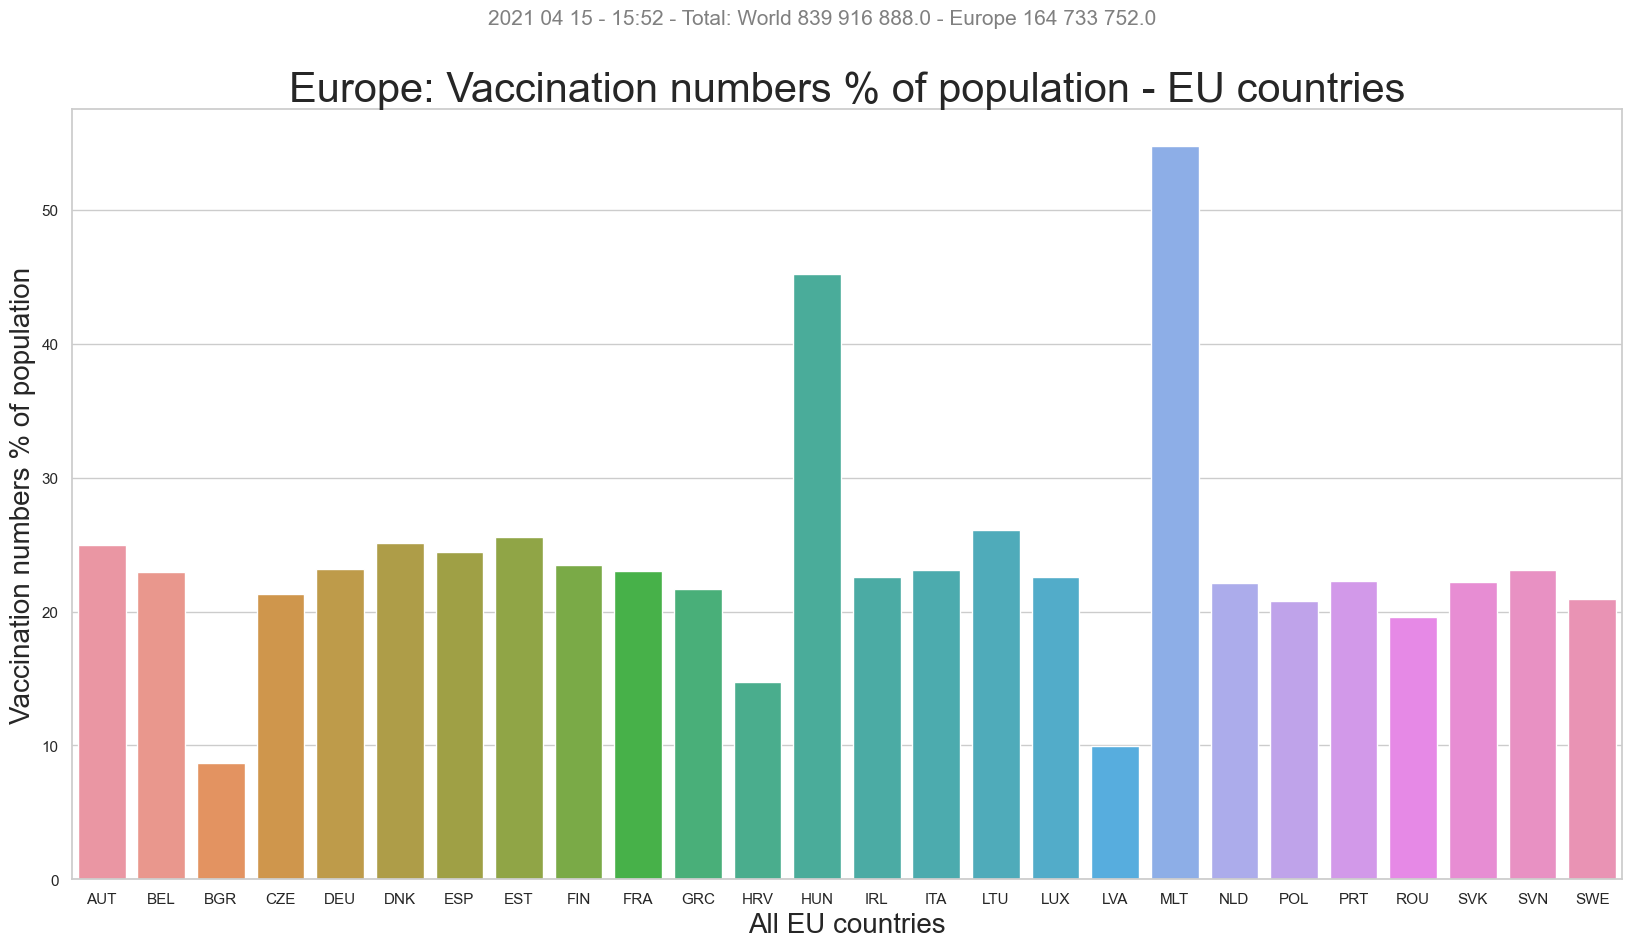

In [56]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "vaccinations_population_percent", data=CountriesDataEuropeEU). \
            set_title("Europe: Vaccination numbers % of population - EU countries", \
                      fontsize=30)
style = dict(size=10, color='gray')

plt.ylabel("Vaccination numbers % of population",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/EU_PercentVaccinationperCountry.png",bbox_inches="tight")
plt.show()

In [57]:
CountriesDataEuropeEU
#WDpopulationEuropeEU

,total_vaccinations,head_gender,ISO3166-1,memberEU,country,vaccinations_population_percent
6,2197468.0,male,AUT,Member in EU,Austria,24.945114
16,2626923.0,male,BEL,Member in EU,Belgium,22.979877
5,605377.0,male,BGR,Member in EU,Bulgaria,8.648195
23,2278965.0,male,CZE,Member in EU,Czech Republic,21.310810
14,19244464.0,female,DEU,Member in EU,Germany,23.144469
20,1463627.0,female,DNK,Member in EU,Denmark,25.116024
42,11436073.0,male,ESP,Member in EU,Spain,24.471067
25,338922.0,female,EST,Member in EU,Estonia,25.582494
3,1293219.0,female,FIN,Member in EU,Finland,23.508615
7,15348439.0,male,FRA,Member in EU,France,23.036019


### Countries in EU not delivering Vaccination statistics

In [58]:
CountriesDataEuropeAll[(CountriesDataEuropeAll["memberEU"] == "Member in EU") & \
(CountriesDataEuropeAll["total_vaccinations"] == 0 )][{"total_vaccinations","country","ISO3166-1","memberEU"}]

,total_vaccinations,country,ISO3166-1,memberEU


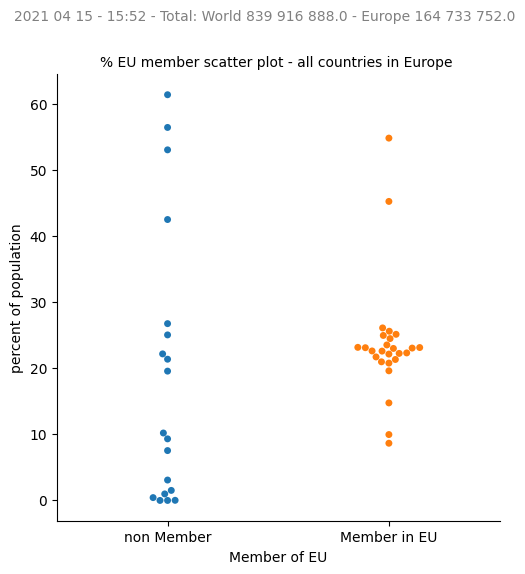

In [59]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [60]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 18 to 12
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_vaccinations               45 non-null     float64
 1   head_gender                      45 non-null     object 
 2   ISO3166-1                        45 non-null     object 
 3   memberEU                         45 non-null     object 
 4   country                          45 non-null     object 
 5   vaccinations_population_percent  45 non-null     float64
dtypes: float64(2), object(4)
memory usage: 3.5+ KB


In [61]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

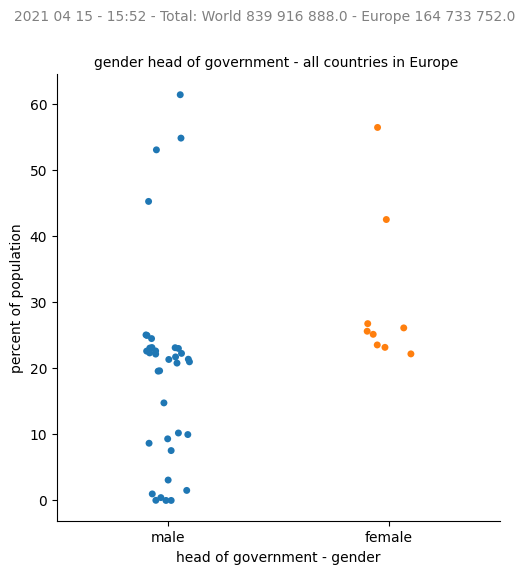

In [62]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

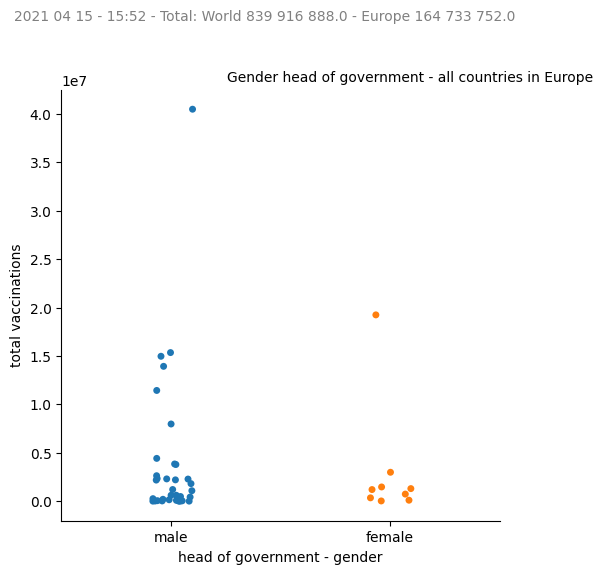

In [63]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [64]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

839 916 888.0 (174, 5) 164 733 752.0 (44, 23)


In [65]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-04-15 15:53:49.983741
Time elapsed (hh:mm:ss.ms) 0:01:33.489609


In [66]:
#The Global State of Democracy Indices
#stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
#df = pd.read_stata(stata_democracy_indices)